In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [64]:
# !gdown 1q8KKl03WBxrhcwCZcLDrlavVYyUfUdlf
df = pd.read_excel('/Users/tarique/Documents/Github/TimeSeries/myntrasales.xlsx')

df.shape

(217, 2)

In [65]:
df.head()

,DATE,Sales
0,2001-01-01,6519.0
1,2001-02-01,6654.0
2,2001-03-01,7332.0
3,2001-04-01,7332.0
4,2001-05-01,8240.0


In [66]:
df.Sales.describe()

count      198.000000
mean     10842.757576
std       2605.006293
min        108.000000
25%       8856.000000
50%      10745.000000
75%      12399.750000
max      23740.000000
Name: Sales, dtype: float64

In [67]:
df.DATE.describe()

count                              217
mean     2009-12-31 04:25:26.267281152
min                2001-01-01 00:00:00
25%                2005-07-01 00:00:00
50%                2010-01-01 00:00:00
75%                2014-07-01 00:00:00
max                2019-01-01 00:00:00
Name: DATE, dtype: object

In [68]:
df.index

RangeIndex(start=0, stop=217, step=1)

In [69]:
df.set_index('DATE',inplace=True)

In [70]:
df.index

DatetimeIndex(['2001-01-01', '2001-02-01', '2001-03-01', '2001-04-01',
               '2001-05-01', '2001-06-01', '2001-07-01', '2001-08-01',
               '2001-09-01', '2001-10-01',
               ...
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', length=217, freq=None)

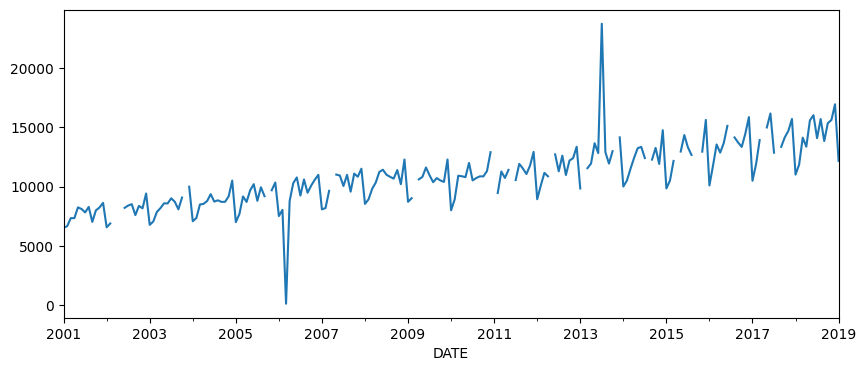

In [71]:
plt.figure(figsize=(10, 4))  # Set the figure size

df.Sales.plot()
plt.show()

In [72]:
df[df.Sales.isna()]

,Sales
DATE,
2002-03-01,NaN
2002-04-01,NaN
2002-05-01,NaN
2003-11-01,NaN
2005-10-01,NaN
2007-04-01,NaN
2009-03-01,NaN
2011-01-01,NaN
2011-06-01,NaN


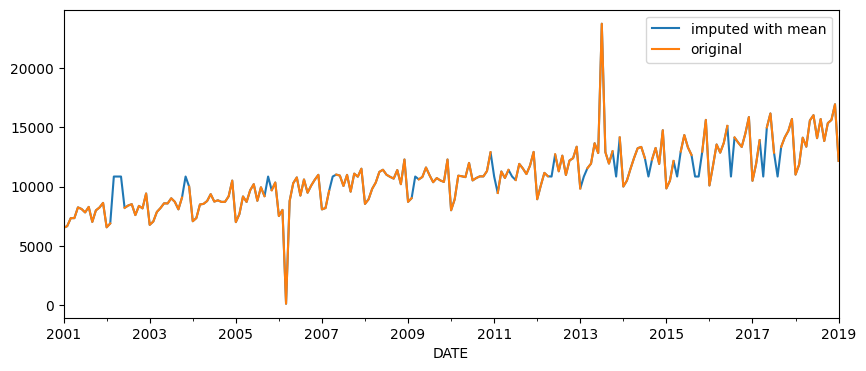

In [73]:
plt.figure(figsize=(10,4))
df.Sales.fillna(df.Sales.mean()).plot(label = 'imputed with mean')
df.Sales.plot(label = 'original')
plt.legend()
plt.show()

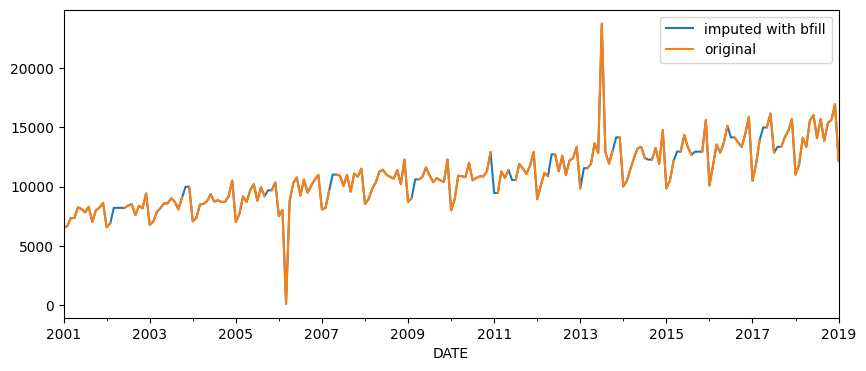

In [74]:
plt.figure(figsize=(10,4))
df.Sales.bfill().plot(label = 'imputed with bfill')
df.Sales.plot(label = 'original')
plt.legend()
plt.show()

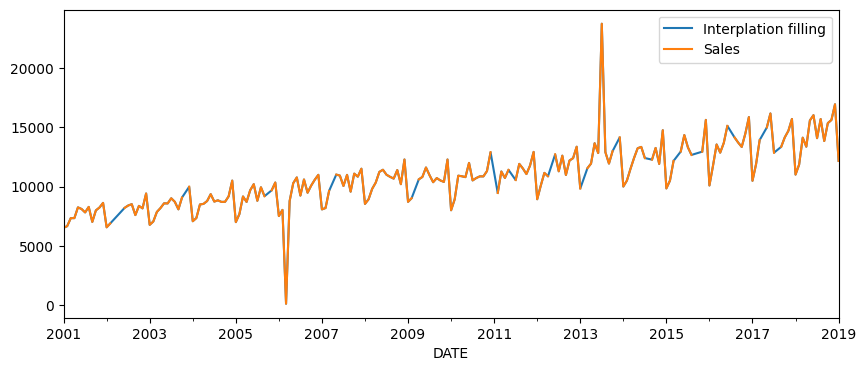

In [75]:
plt.figure(figsize=(10,4))
df.Sales.interpolate(method='linear').plot(label = 'Interplation filling')
df.Sales.plot()
plt.legend()
plt.show()

In [76]:
df.Sales = df.Sales.interpolate(method='linear')


[]

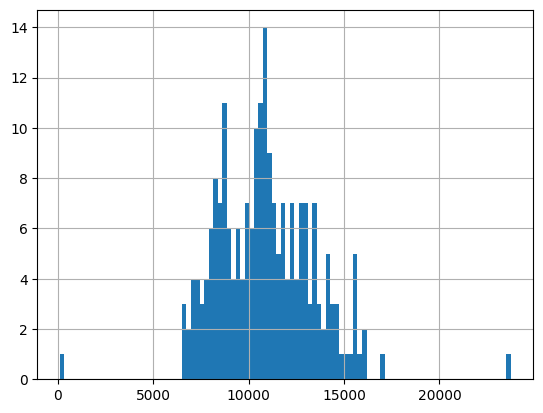

In [77]:
df.Sales.hist(bins=100).plot()

<Axes: xlabel='DATE'>

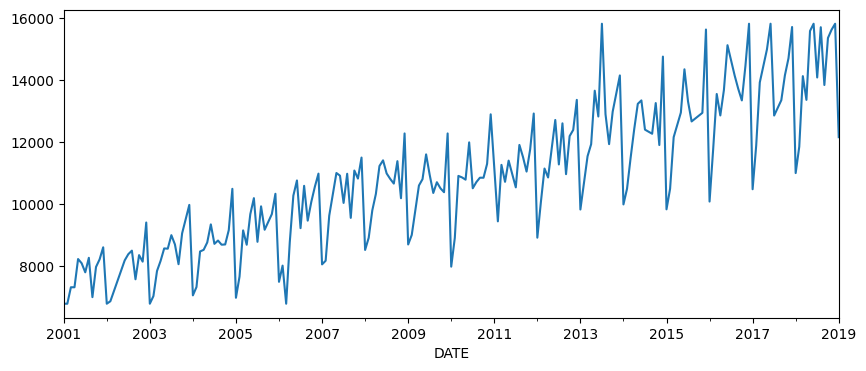

In [ ]:
plt.figure(figsize=(10,4))
df.Sales = df.Sales.clip(upper=df.Sales.quantile(0.98),lower=df.Sales.quantile(.02))



In [ ]:
#Trend-> going up / moving down
#Seasonality - > You are doing some activity and continuous pattern is coming up

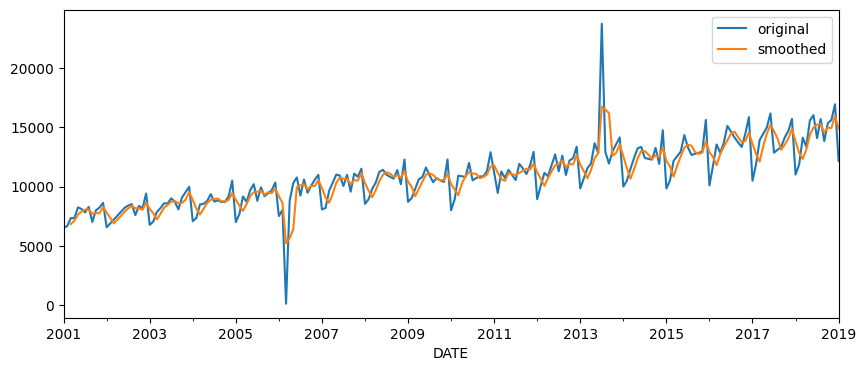

In [83]:
#Moving Average
#Moving Average is a type of smoothing technique that calculates the average of a set of data points over(last n elements)
plt.figure(figsize=(10,4))
df.Sales.plot(label = 'original')
df.Sales.rolling(3,center=False).mean().plot(label='smoothed')
plt.legend()

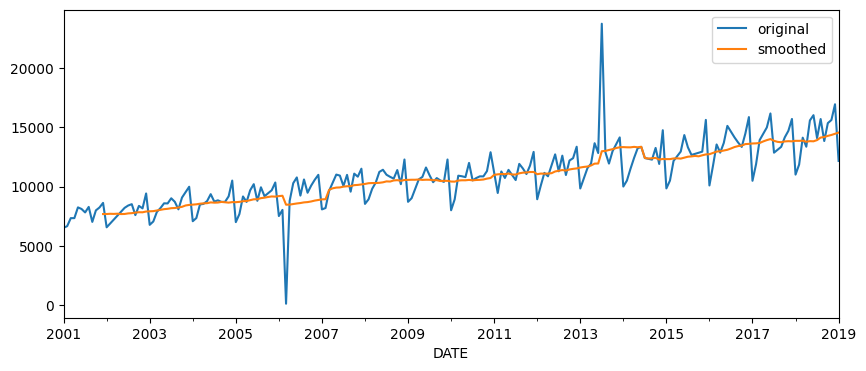

In [84]:
plt.figure(figsize=(10,4))
df.Sales.plot(label = 'original')
df.Sales.rolling(12,center=False).mean().plot(label='smoothed')
plt.legend()

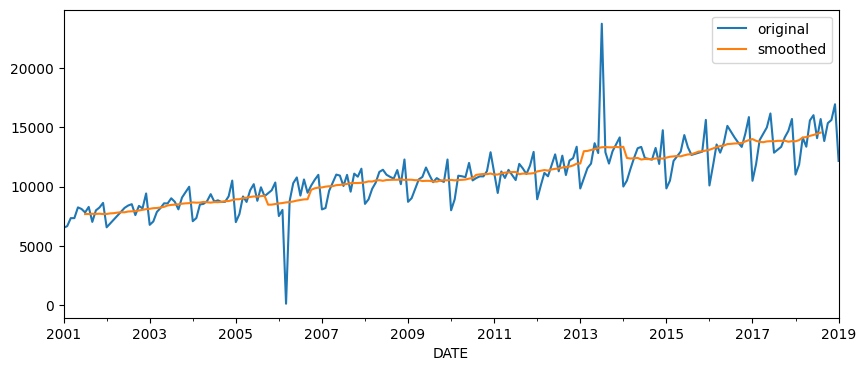

In [85]:
#centered Approach
plt.figure(figsize=(10,4))
df.Sales.plot(label = 'original')
df.Sales.rolling(12,center=True).mean().plot(label='smoothed')
plt.legend()